# Twitter Sentiment Analysis Project

This is one of the reasons why social listening ― monitoring conversations on social media platforms ― has become a crucial process in social media marketing. Monitoring Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry. 

#### Sentiment analysis is the automated process of identifying and extracting the subjective information that underlies a text. This can be either an opinion, a judgment, or a feeling about a particular topic or subject.

####  The most common type of sentiment analysis is called ‘polarity detection’ and involves classifying a statement as ‘positive’, ‘negative’, or ‘neutral’.

#### Sentiment analysis tools use machine learning and natural language processing (NLP) to organize unstructured text data automatically. Sentiment analysis algorithms are able to learn from data samples to detect the polarity of Tweets in real-time.

In [1]:
#Importing Libaries

import pandas as pd
import numpy as np
import seaborn as sns

import re                   # regular expression
import nltk                 # natural language tool kit

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Reading twitter csv data ...

twitter = pd.read_csv("train.csv")

In [4]:
twitter

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
twitter.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

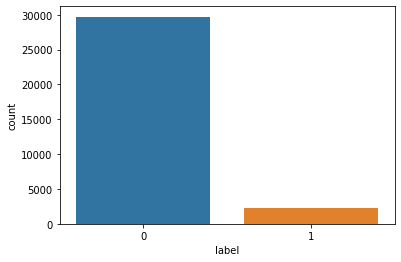

In [6]:
sns.countplot(twitter.label)

In [7]:
#size of data...

twitter.shape 

(31962, 3)

In [8]:
#Null Values...

twitter.isna().sum() 

id       0
label    0
tweet    0
dtype: int64

In [9]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [10]:
#Statistical data...

twitter.describe() 

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


### Cleaning of Data with nltk

In [11]:
#Removing stopwords on train file...

from nltk.corpus import stopwords

stop = stopwords.words("english")
stop.extend(["i'm","I'm"])

twitter.tweet = twitter.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
twitter.head()

,id,label,tweet
0,1,0,@user father dysfunctional selfish drags kids ...
1,2,0,@user @user thanks #lyft credit can't use caus...
2,3,0,bihday majesty
3,4,0,#model love u take u time urð±!!! ððð...
4,5,0,factsguide: society #motivation


In [12]:
def clean(a):
    a=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",a).split())
    return a

In [13]:
#Removing Hyperlinks and user ID on train file..

twitter.tweet = twitter.tweet.apply(clean)
twitter.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,user thanks lyft credit can't use cause offer ...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [14]:
#Applying Lemmatization...

from nltk.stem.wordnet import WordNetLemmatizer
w = WordNetLemmatizer()

twitter.tweet = twitter.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()]))    # v stands for verb
twitter.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drag kid dysfunct...
1,2,0,user thank lyft credit can't use cause offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [15]:
twitter.tweet = twitter.tweet.apply(lambda a:' '.join([word.lower() for word in a.split()]))

#### Applying same techniques for test data for cleaning

In [16]:
#Removing stopwords...

test = pd.read_csv("test.csv")

#Removing Stopwards...

test.tweet=test.tweet.apply(lambda a: ' '.join([word for word in a.split() if word not in (stop)]))

#Removing Hyperlinks,userIDS....

test.tweet = test.tweet.apply(clean)

#Applying Lemmatization....

w1 = WordNetLemmatizer()
test.tweet=test.tweet.apply(lambda a:' '.join([w1.lemmatize(word,'v') for word in a.split()])) 
test.tweet=test.tweet.apply(lambda a:' '.join([word.lower() for word in a.split()]))

#### Applying TFIDF Vectorizer for train and test data

In [17]:
#Applying TFIDF Vectorizer to train and test data....

from sklearn.feature_extraction.text import TfidfVectorizer

t = TfidfVectorizer()

In [18]:
new = t.fit_transform(twitter.tweet)
new

<31962x35865 sparse matrix of type '<class 'numpy.float64'>'
	with 253455 stored elements in Compressed Sparse Row format>

In [19]:
test_inp = t.transform(test.tweet)
test_inp

<17197x35865 sparse matrix of type '<class 'numpy.float64'>'
	with 123657 stored elements in Compressed Sparse Row format>

#### Applying "SMOTE" Technique to Balance the Data

In [20]:
#Importing Smote...

from imblearn.combine import SMOTETomek

s = SMOTETomek(random_state=42)

a,b = s.fit_sample(new,twitter.label)

In [21]:
print(a.shape)
print(b.shape)

(59440, 35865)
(59440,)


In [22]:
b.value_counts()

1    29720
0    29720
Name: label, dtype: int64

### Applying Navie Bayes Algorithm Method...

In [23]:
#Navie Bayes Method...
#Importing BernNB

from sklearn.naive_bayes import MultinomialNB

m = MultinomialNB()

In [24]:
m.fit(a,b)

MultinomialNB()

In [25]:
#Prediction...

m_train = m.predict(a)
m_test = m.predict(test_inp)

In [26]:
# Classification report ..

from sklearn.metrics import classification_report

print("Report on Train")
print(classification_report(b,m_train))

Report on Train
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     29720
           1       0.95      0.99      0.97     29720

    accuracy                           0.97     59440
   macro avg       0.97      0.97      0.97     59440
weighted avg       0.97      0.97      0.97     59440



In [27]:
# Testing On New Message using multinomial NB from train data...

new_message = pd.Series("retweet if you agree!")
new_message_transformed = t.transform(new_message)

m.predict(new_message_transformed)

array([1], dtype=int64)

In [28]:
# Testing On New Message using multinomial NB from train data...

new_message = pd.Series("i get to see my daddy today!!   #80days #gettingfed")
new_message_transformed = t.transform(new_message)

m.predict(new_message_transformed)

array([0], dtype=int64)

### Applying Logistic Regression...

In [29]:
#Logistic Regression....

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

reg.fit(a,b)

LogisticRegression()

In [30]:
#Prediction...

lg_train_pred = reg.predict(a)

lg_test_pred = reg.predict(test_inp)

In [31]:
#Classification Report ....

from sklearn.metrics import classification_report,recall_score

print("Report on train")

print(classification_report(b,lg_train_pred))

Report on train
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     29720
           1       0.97      0.97      0.97     29720

    accuracy                           0.97     59440
   macro avg       0.97      0.97      0.97     59440
weighted avg       0.97      0.97      0.97     59440



# Conclusion:

We have performed two methods on twiter sentiment analyish which are **Navie Bayes** and **Logistic regression** in order to find out if a **tweet is giving a postive response or negative response.**

Out of this both the methods **Logistic regression gave better accurracy which is 0.933333333333** while **Navie bayes was 0.903825136612**.                            
Therefore we can consider logistic regression as the best method to differentiate between if a tweet is a negative or postive one.